In [9]:
## lets import the package

import numpy as np
import pandas as pd
import sklearn
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt 


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn import metrics
from IPython.display import Image
#from pydotplus import graph_from_dot_data




In [10]:
#. Lets import our data and obtain the first five rows.
df = pd.read_csv("/Users/jephteestiverne/Desktop/CovidProject/Covid_Sample_Data.csv")
#print(df)
df.head(6)

,Unnamed: 0,State,Start_week,End_week,Total_Deaths,Place_of_Death
0,1,United States,2020-02-01,2020-11-07,716707,"Healthcare Setting, Inpatient"
1,2,United States,2020-02-01,2020-11-07,145939,"Healthcare Setting, Outpatient or Emergency Room"
2,3,United States,2020-02-01,2020-11-07,7013,"Healthcare Setting, Dead on Arrival"
3,4,United States,2020-02-01,2020-11-07,833215,Decedent's Home
4,5,United States,2020-02-01,2020-11-07,153348,Hospice Facility
5,6,United States,2020-02-01,2020-11-07,424540,Nursing Home or Long Term Care Facility


In [11]:
# Lets drop the unnecessary columns to avoid the dummy variable trap
df = df.drop(['Unnamed: 0','State',
 'Start_week',
 'End_week',], axis=1)



In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=12, random_state=1)
new = df._get_numeric_data().dropna(axis=1)
km.fit(new)
predict=km.predict(new)

df['Places'] = pd.Series(predict, index=df.index)

In [13]:


# Lets drop the unnecessary columns to avoid the dummy variable trap
df = df.drop(['Place_of_Death',], axis=1)

In [14]:
# Let's create a binary variable for the emphasis on theft. 
df['Death_Binary'] = np.where(df['Total_Deaths'] > 0,1,0)
# confirming our new column binary variable
df.head(6)

,Total_Deaths,Places,Death_Binary
0,716707,1,1
1,145939,5,1
2,7013,8,1
3,833215,6,1
4,153348,5,1
5,424540,2,1


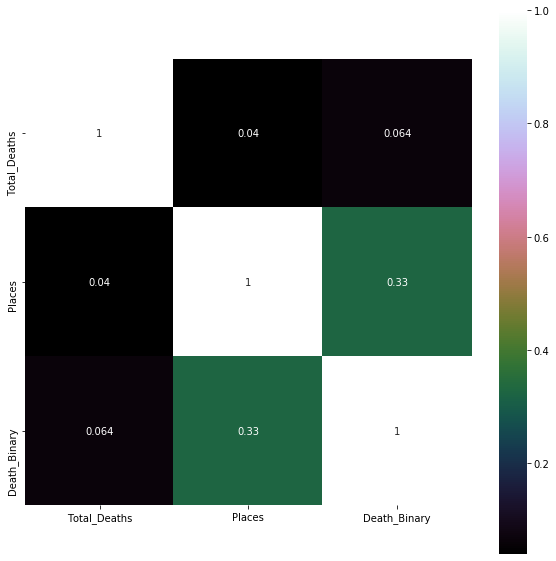

In [15]:
# We can also use a Correlation heatmap. The importance of the aesthetics of a heatmap cannot be overlooked; after all, the main purpose of creating a graphic representation of data is for better understanding. This article will walk you through several ways that a correlation heatmap can be tweaked or customized to improve its readability, which is essential to effectively present your data.
# Reference : https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
# Notice how our binary variable has a mostly positive correlation.  

/Users/jephteestiverne/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/jephteestiverne/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


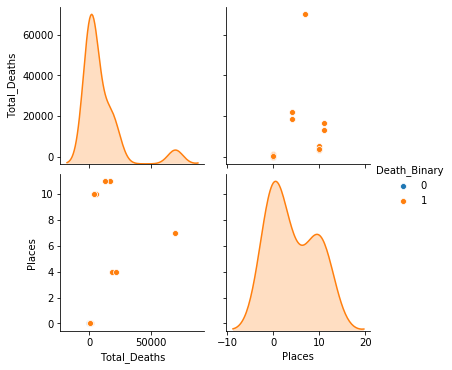

In [18]:
# Let's now obtain five percent of our sample data and do a Pairwise Plots. Note that this is computationally expensive.
df_sample = df.sample(frac=0.05)
##Pairwise plots
pplot = sns.pairplot(df_sample, hue="Death_Binary")




In [20]:
x = len(df[df['Death_Binary'] == 1])
x# total theft in our sample crimes  = 108905
y = len(df[df['Death_Binary'] == 0])
y# total NOT theft in our sample crimes  = 379365
z = (round(float(len(df[df['Death_Binary'] == 1])) / len(df) * 100), 3)# % people left = 24.0%
# percentage of crimes that are theft related 
z

(91, 3)

In [21]:
# Lets now Randomly split the data into test, training, and validation sets.
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
# This is crucial to avoid having one subgroup of the data overrepresented in either our training or testing datasets, hence df.sample(Wikipedia).
print (train.shape, test.shape, validate.shape)
#(292903, 4) (97635, 4) (97635, 4)





(249, 3) (83, 3) (83, 3)


In [22]:
# Separate target and predictors
y_train = train['Death_Binary']
x_train = train.drop(['Death_Binary'], axis=1)
y_test = test['Death_Binary']
x_test = test.drop(['Death_Binary'], axis=1)
y_validate = validate['Death_Binary']
x_validate = validate.drop(['Death_Binary'], axis=1)

In [25]:
# Check the balance of the splits on y_. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest().
y_test.mean()
# 0.8674698795180723
y_train.mean()
#0.927710843373494

0.927710843373494

In [29]:
logreg = LogisticRegression().fit(x_train ,y_train)
logreg

print("Training set score: {:.3f}".format(logreg.score(x_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test,y_test)))

import statsmodels.api as sm
#logit_model=sm.Logit(y,x)
#result=logit_model.fit()


Training set score: 1.000
Test set score: 1.000


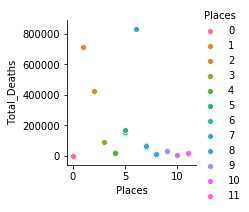

In [32]:
sns.pairplot(df,x_vars=['Places'],y_vars=['Total_Deaths'],hue='Places')

#sns.pairplot(df,hue='Places')

In [33]:
df.corr()

,Total_Deaths,Places,Death_Binary
Total_Deaths,1.000000,0.039601,0.064131
Places,0.039601,1.000000,0.325389
Death_Binary,0.064131,0.325389,1.000000


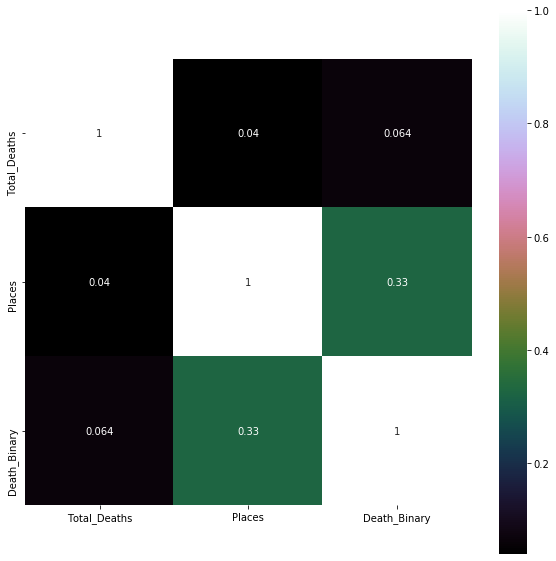

In [35]:
#We can also use a Correlation heatmap. The importance of the aesthetics of a heatmap cannot be overlooked; after all, the main purpose of creating a graphic representation of data is for better understanding. This article will walk you through several ways that a correlation heatmap can be tweaked or customized to improve its readability, which is essential to effectively present your data.
# Reference : https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
# Notice how our binary variable has a mostly positive correlation.  

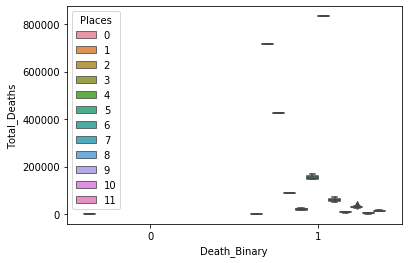

In [37]:
sns.boxplot(y='Total_Deaths',x='Death_Binary',hue='Places', data=df)

In [38]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(x_train)
X_train_Sm= sm.add_constant(x_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:           Death_Binary   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     10.39
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           4.64e-05
Time:                        16:08:00   Log-Likelihood:                -6.8033
No. Observations:                 249   AIC:                             19.61
Df Residuals:                     246   BIC:                             30.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8554      0.022     38.152   